# <span style="color:darkblue"> Lecture 17: Neural Networks and Tensor Flow </span>

<font size = "5">

In this class we will talk about how to set up <br>
a neural network classifier using Tensor Flow

For an introduction

https://www.youtube.com/watch?v=i8NETqtGHms

# <span style="color:darkblue"> I. Setup Working Environment </span>



<font size = "5">

We will be using a new library called "Tensor Flow" that is used <br>
to create neural network architectures

In Windows (Anaconda Prompt) or Mac (Terminal) type:

``` conda install tensorflow ```

In [1]:
# Import the package for the University of California Irvine API
from ucimlrepo import fetch_ucirepo 

# Import SK-Learn library for machine learning functions
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn.metrics import get_scorer_names


# Import standard data analysis packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


<font size = "5">

Import tensor flow packages

In [2]:

# Import standard data analysis packages
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense

# <span style="color:darkblue"> II. Data </span>

<font size = "5">

Online Shoppers Purchasing Intention Dataset (OSHPID)

- This dataset contains information about user sessions
- It contains features data about user behavior 
while <br> navigating website
- The goal is to predict whether the customer will purchase or not

https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset


In [3]:
# Fetch online data from the UC Irvine Machine Learning Repository API
online_shopping= fetch_ucirepo(id=468) 

# Extract
X = online_shopping.data.features
# Drop columns that contain non-numeric values
X = X.drop(columns = ["Month","VisitorType"])

# Extract label data
y = online_shopping.data.targets["Revenue"]


In [5]:
X['Weekend'] = X['Weekend'].astype(int)

In [6]:
display(X)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11,0


In [14]:
print(X['TrafficType'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]


In [15]:
# Convert to float types (avoids issues down the line)
X = np.asarray(X).astype(np.float32)
y = np.asarray(y).astype(np.float32)

<font size = "5">

Pre-process data prior to running model

In [16]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=104,  
                                   test_size=0.25,  
                                   shuffle=True) 

In [17]:
# The first step is to produce a "scaler" function
scaler_train = preprocessing.StandardScaler().fit(X_train)
scaler_test  = preprocessing.StandardScaler().fit(X_test)

# Apply scaler function
X_train_scale = scaler_train.transform(X_train)
X_test_scale  = scaler_test.fit(X_test).transform(X_test)

# <span style="color:darkblue"> III. Training a neural network </span>


<font size = "5">

Define number of features in $X$

In [19]:
k_features = X.shape[1]

In [21]:
print(k_features)

15


<font size = "5">

To define a neural network we start with a configuration setup

- We start with an empty canvas with "Keras"
- Then we successively add how many layers we want <br>
and what type

For more information about Keras layers:

https://www.educative.io/answers/what-are-keras-layers

In [20]:
# "basic_model" for now only starts with a configuration

basic_model = keras.models.Sequential()

In [22]:
# We add how many layers we want, starting with the input layer and 
# ending with the output layer

# This has a dense layer for inputs with "k" features
basic_model.add(Dense(units=16, activation='relu', input_shape=(k_features,)))

# This is the output layer. The sigmoid defines predictions in (0,1)
# We choose 1 unit since there is a scalar output (binary classification)

basic_model.add(Dense(units = 1, activation='sigmoid'))

# Note: If you are using the neural network to predict continuous outcomes,
# you may want a different activation function in the output layer

/Users/gracebarringer/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<font size = "5">

Define an optimizer

In [23]:
# Adam is a type of optimization algorithm

adam = keras.optimizers.Adam(learning_rate=0.001)

In [24]:
# Define the loss function to optimize

basic_model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

<font size = "5">

Estimate model

- The optimization algorithm proceeds sequentially, through epocs
- Set a random seed to ensure reproducibility

In [25]:
# Set random seed
tf.keras.utils.set_random_seed(0)  

# Train model
basic_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 1s 304us/step - accuracy: 0.7400 - loss: 28.3785 
Epoch 2/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - accuracy: 0.8580 - loss: 0.7375
Epoch 3/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - accuracy: 0.8705 - loss: 0.6557
Epoch 4/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - accuracy: 0.8662 - loss: 0.6398
Epoch 5/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - accuracy: 0.8653 - loss: 0.6179
Epoch 6/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 284us/step - accuracy: 0.8708 - loss: 0.5884
Epoch 7/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - accuracy: 0.8718 - loss: 0.5255
Epoch 8/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 288us/step - accuracy: 0.8634 - loss: 0.6275
Epoch 9/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step - accuracy: 0.8644 - loss: 0.6778
Epoch 10/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - accuracy: 0.8663 - loss: 0.6004
Epoch 11/100
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - accuracy: 0.8666 - loss: 0.5897
Epoch 12/100
289/

# <span style="color:darkblue"> IV. Evaluate a neural network </span>


<font size = "5">

Obtain predicted probabilities and convert them to {0,1}

In [47]:
# Convert to array
predicted_prob = basic_model.predict(X_test)
predicted_prob = tf.squeeze(predicted_prob)

# Convert to {0,1} predictions using a 0.5 threshold
threshold = 0.5
predicted = np.array([1 if x >= threshold else 0 for x in predicted_prob])

 1/97 [..............................] - ETA: 1s

97/97 [==============================] - 0s 636us/step


<font size = "5">

Obtain confusion matrix

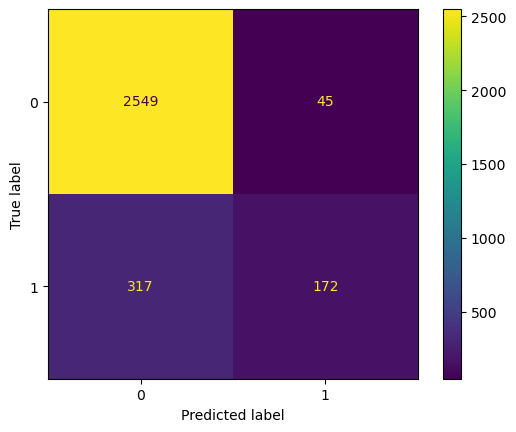

In [48]:
# Obtain confusion matrix
cm = confusion_matrix(y_test, predicted)

displ = ConfusionMatrixDisplay(confusion_matrix=cm)
displ.plot()

<font size = "5">

At the moment we defined a very simple neural network <br>
with just an input layer and an output layer. <br>

Try it yourself!

- Increase the number of units in the input layer
- Does prediction accuracy improve?


In [ ]:
# Write your own code




<font size = "5">


Try it yourself!

- Add one or more hidden layers
- Does prediction accuracy improve?

In [ ]:
# Write your own code






<font size = "5">

Try it yourself!

- Import the Mashable dataset that we used earlier <br>
(you can find this in this in the ```ArticlesTrain.csv``` and <br>
```ArticlesTest.csv``` files in the ```data_raw``` folder)

- Try to set up a neural network with a simple input-output layer 

In [ ]:
# Write your own code






# <span style="color:darkblue"> V. Additional resources </span>

<font size = "5">

Quick guide:

https://www.tensorflow.org/tutorials/quickstart/beginner

Binary classification:

https://www.freecodecamp.org/news/binary-classification-made-simple-with-tensorflow/

Image classification:

https://www.tensorflow.org/tutorials/images/classification

